In [1]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


c:\Users\maurice\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 清理文本的函數
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # 移除 URL
    text = re.sub(r"@\w+", "", text)    # 移除提及
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # 移除非字母字符
    text = text.lower().strip()  # 小寫化並去除多餘空格
    return text


In [3]:
# 使用 VADER 進行情感分析
def analyze_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "POSITIVE"
    elif score['compound'] <= -0.05:
        return "NEGATIVE"
    else:
        return "NEUTRAL"


In [4]:
# 讀取 CSV 文件
file_path = './src/top_election_posts_2024.csv'
data = pd.read_csv(file_path, encoding='latin1')

# 限制使用前 300 筆數據
data = data.head(300)

# 清理文本
data = data.dropna(subset=['text'])
data['cleaned_text'] = data['text'].apply(clean_text)
data = data[data['cleaned_text'].str.strip().str.len() > 5]


In [5]:
# 初始化 VADER 分析器
analyzer = SentimentIntensityAnalyzer()

# 添加情感分析列
data['sentiment'] = data['cleaned_text'].apply(analyze_sentiment_vader)


In [6]:
# 計算情感分佈
sentiment_counts = data['sentiment'].value_counts(normalize=True)
print("Sentiment Distribution:")
print(sentiment_counts)

# 如果想要在 Jupyter 中展示數據框
data.head()


Sentiment Distribution:
sentiment
POSITIVE    0.614094
NEGATIVE    0.342282
NEUTRAL     0.043624
Name: proportion, dtype: float64


,subreddit,id,title,text,author,created_at,upvotes,num_comments,url,permalink,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,cleaned_text,sentiment
0,PoliticalDiscussion,1gksts4,Why did Kamala Harris lose the election?,Pennsylvania has just been called. This was th...,hearsdemons,2024/11/6 15:17,2106,4815,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pennsylvania has just been called this was the...,POSITIVE
1,PoliticalDiscussion,1ef5frf,Harris's campaign has a different campaign str...,It seems like Harris has given up on trying to...,No-Touch-2570,2024/7/30 01:30,1839,1009,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,it seems like harris has given up on trying to...,POSITIVE
4,PoliticalDiscussion,1gi79lt,Republican Senate leader Mitch McConnell ackno...,Link to his words on it: * https://x.com/harri...,Spiderwig144,2024/11/3 05:44,1524,306,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,link to his words on it and heres a link to ...,NEGATIVE
5,PoliticalDiscussion,18mg5pb,The Colorado Supreme Court on Tuesday said Don...,Colorado Supreme Court rules Trump disqualifie...,jojlo,2023/12/20 07:45,1492,1294,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,colorado supreme court rules trump disqualifie...,POSITIVE
6,PoliticalDiscussion,1bkq6ra,"With Lara Trump now running the RNC, rules wer...","With Lara Trump in place by her Father, rules ...",Deleted,2024/3/22 11:48,1382,407,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,with lara trump in place by her father rules h...,POSITIVE


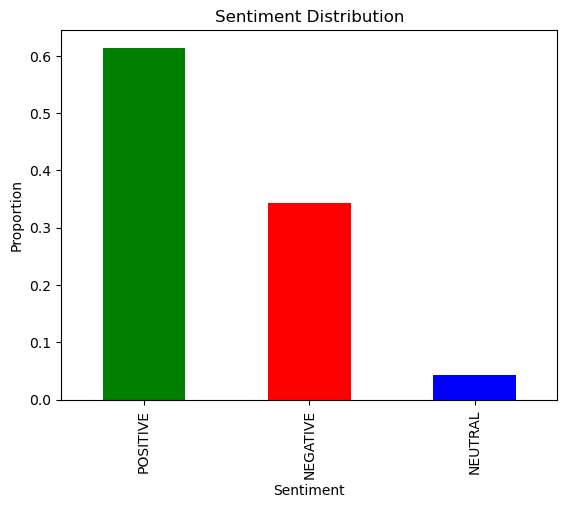

In [7]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()


### 初步結果可視化